# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres. 

### A sample dataset might look like :





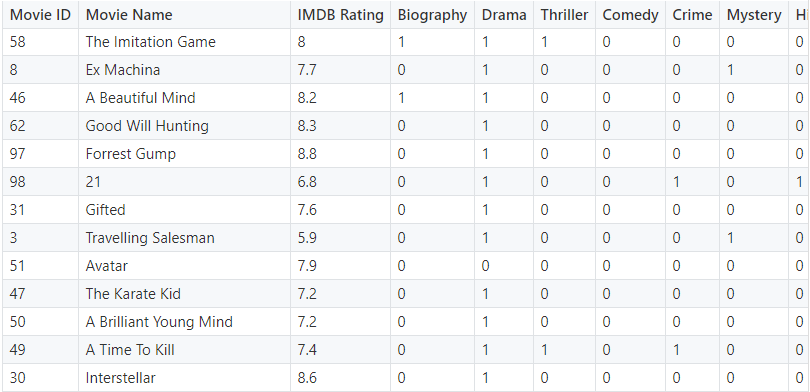

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
import ast 
import matplotlib.pyplot as plt

In [132]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
movie_df=pd.read_csv('/content/drive/MyDrive/DataScience/imdb_data.csv')
movie_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [134]:
movie_df.shape

(3000, 23)

In [135]:
movie_df.keys()

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [136]:
#We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres
#So lets only take the required columns for further processing
Req_cols=['id','title','popularity','genres']
rm_df=movie_df[Req_cols]

In [137]:
rm_df.head()

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,"[{'id': 35, 'name': 'Comedy'}]"
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,3,Whiplash,64.299990,"[{'id': 18, 'name': 'Drama'}]"
3,4,Kahaani,3.174936,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,5,Marine Boy,1.148070,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [138]:
rm_df.shape

(3000, 4)

In [139]:
movie_df['belongs_to_collection'].isnull().sum()

2396

In [140]:
movie_df['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [141]:
movie_df['genres'].isnull().sum()

7

In [142]:
movie_df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [143]:
movie_df['runtime'].value_counts()

90.0     100
100.0     99
105.0     91
95.0      89
98.0      85
        ... 
11.0       1
62.0       1
66.0       1
248.0      1
177.0      1
Name: runtime, Length: 139, dtype: int64

In [144]:
len(movie_df['runtime'].value_counts())

139

In [145]:
movie_df['popularity'].value_counts()

0.318437     2
0.438490     1
19.638605    1
12.929653    1
4.548774     1
            ..
11.372370    1
14.178281    1
1.818296     1
8.075698     1
7.873018     1
Name: popularity, Length: 2999, dtype: int64

In [146]:
len(movie_df['popularity'].value_counts())

2999

In [147]:
movie_df['popularity'].max()

294.337037

In [148]:
np.round(movie_df['popularity'].min(),6)

1e-06

In [149]:
#print(np.round(134e+06),4)

In [150]:
movie_df['Keywords'][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [151]:
movie_df['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [152]:
movie_df['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [153]:
movie_df['genres'].isnull().sum()

7

In [154]:
rm_df.isnull().sum()

id            0
title         0
popularity    0
genres        7
dtype: int64

In [155]:
rm_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
rm_df.isnull().sum()

id            0
title         0
popularity    0
genres        0
dtype: int64

In [157]:
rm_df.tail(10)

,id,title,popularity,genres
2990,2991,B.A.P.S.,1.560980,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
2991,2992,Save the Last Dance,4.794088,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
2992,2993,The Thief of Bagdad,3.878515,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
2993,2994,The Terminal,14.092373,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2994,2995,School Ties,7.438381,"[{'id': 18, 'name': 'Drama'}]"
2995,2996,Chasers,9.853270,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2996,2997,We Are the Best!,3.727996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
2997,2998,The Long Kiss Goodnight,14.482345,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
2998,2999,Along Came Polly,15.725542,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2999,3000,Abduction,10.512109,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n..."


In [158]:
rm_df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
rm_df.reset_index(drop=True,inplace=True)

In [160]:
rm_df.shape

(2993, 4)

In [161]:
rm_df.tail()

,id,title,popularity,genres
2988,2996,Chasers,9.853270,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2989,2997,We Are the Best!,3.727996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
2990,2998,The Long Kiss Goodnight,14.482345,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
2991,2999,Along Came Polly,15.725542,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2992,3000,Abduction,10.512109,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n..."


In [162]:
rm_df['genres']

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2988    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2989    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2990    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2991    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2992    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 2993, dtype: object

In [163]:
type(rm_df['genres'])

pandas.core.series.Series

In [164]:
type(rm_df['genres'][1])

str

In [165]:
rm_df['genres'][1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [166]:
rm_df['genres'][1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [167]:
type(rm_df['genres'][0])

str

In [168]:
rm_df.tail()

,id,title,popularity,genres
2988,2996,Chasers,9.853270,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2989,2997,We Are the Best!,3.727996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
2990,2998,The Long Kiss Goodnight,14.482345,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
2991,2999,Along Came Polly,15.725542,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2992,3000,Abduction,10.512109,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n..."


In [169]:
rm_df['genres'][1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [170]:
# Using literal_eval in ast module to convert string of dictionary to list of dictionary
for i in range(0,2993):
  #print(rm_df['genres'][i])
  rm_df['genres'][i]=ast.literal_eval(rm_df['genres'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [171]:
type(rm_df['genres'][1])

list

In [172]:
#for i in range(0,2993):
 # print(rm_df['genres'][i])

In [173]:
rm_df['genres'][1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [174]:
#for d in rm_df['genres'][1]:
 # print(d)

In [175]:
#[d['name'] for d in rm_df['genres'][1] if 'name' in d]

In [176]:
rm_df.head()

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,"[{'id': 35, 'name': 'Comedy'}]"
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,3,Whiplash,64.299990,"[{'id': 18, 'name': 'Drama'}]"
3,4,Kahaani,3.174936,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,5,Marine Boy,1.148070,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [177]:
for d in range(0,5):
  print(rm_df['genres'][d])

[{'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [178]:
[d['name'] for d in rm_df['genres'][1] if 'name' in d]

['Comedy', 'Drama', 'Family', 'Romance']

In [179]:
type(['Comedy', 'Drama', 'Family', 'Romance'])

list

In [180]:
for i in range(0,2993):
  rm_df['genres'][i]=[d['name'] for d in rm_df['genres'][i] if 'name' in d]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [181]:
rm_df.head()

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]
3,4,Kahaani,3.174936,"[Thriller, Drama]"
4,5,Marine Boy,1.148070,"[Action, Thriller]"


In [182]:
type(rm_df['genres'])

pandas.core.series.Series

In [183]:
from collections import Counter
 
# Function to get unique values
def unique(list1):
   
    # Print directly by using * symbol
    print(*Counter(list1))

In [184]:
unique(rm_df['genres'][1])

Comedy Drama Family Romance


In [185]:
array = [['a','b'], ['a', 'b','c'], ['a']]
result ={x for l in array for x in l}
result

{'a', 'b', 'c'}

In [186]:
unique_genres={x for l in rm_df['genres'] for x in l}
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [187]:
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#df = df.join(pd.DataFrame(mlb.fit_transform(rm_df.pop('genres')),
 #                         columns=mlb.classes_,
  #                        index=rm_df.index))

In [188]:
#rm_df.drop('genres', 1).join(
 #   pd.get_dummies(
  #      pd.DataFrame(rm_df.genres.tolist()).stack()
   # ).astype(int).sum(level=0))

In [189]:
rm_df.columns

Index(['id', 'title', 'popularity', 'genres'], dtype='object')

In [190]:
rm_df1 = rm_df['genres'].explode()
rm_df2=rm_df[['id','title','popularity']].join(pd.crosstab(rm_df1.index, rm_df1))

In [191]:
rm_df1

0         Comedy
1         Comedy
1          Drama
1         Family
1        Romance
          ...   
2991      Comedy
2991     Romance
2992    Thriller
2992      Action
2992     Mystery
Name: genres, Length: 7511, dtype: object

In [192]:
rm_df.head()

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]
3,4,Kahaani,3.174936,"[Thriller, Drama]"
4,5,Marine Boy,1.148070,"[Action, Thriller]"


In [193]:
rm_df2.head()

,id,title,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,Hot Tub Time Machine 2,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries 2: Royal Engagement,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,Whiplash,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Kahaani,3.174936,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Marine Boy,1.148070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [194]:
len(rm_df2['title'].unique())

2962

In [195]:
rm_df2.shape

(2993, 23)

In [196]:
len(rm_df2['title'].unique())

2962

In [197]:
rm_df2['title'].drop_duplicates(keep='first',inplace=True)

In [198]:
rm_df2.shape

(2993, 23)

In [199]:
rm_df2.head(3)

,id,title,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,Hot Tub Time Machine 2,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries 2: Royal Engagement,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,Whiplash,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
X= rm_df2.drop('title',axis=1)
y=rm_df2['title']

In [201]:
X.head()

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.174936,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,1.148070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [202]:
y.values

array(['Hot Tub Time Machine 2',
       'The Princess Diaries 2: Royal Engagement', 'Whiplash', ...,
       'The Long Kiss Goodnight', 'Along Came Polly', 'Abduction'],
      dtype=object)

In [203]:
X.shape

(2993, 22)

In [204]:
x1=X[0:1010]
y1=y[0:1010]

In [205]:
x1.head()

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.174936,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,1.148070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [206]:
x1.shape

(1010, 22)

In [207]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.1)

In [208]:
X_test.shape

(101, 22)

In [209]:
y_test.shape

(101,)

In [210]:
X_train.head()

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
118,119,4.304224,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
657,659,8.378149,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
937,939,5.875708,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
809,811,9.874043,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
485,487,7.685548,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [211]:
model=NearestNeighbors(n_neighbors=5,algorithm='auto',n_jobs=-1)
model.fit(X_train,y_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [212]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [213]:
model.kneighbors()

(array([[3.08705008, 3.44920052, 3.67345145, 5.10876283, 5.13184489],
        [2.91081513, 3.58916771, 4.22242195, 4.47888757, 5.14259542],
        [2.38294233, 3.29919205, 4.66789674, 4.99117578, 5.66054585],
        ...,
        [3.5521964 , 4.89132265, 4.90677929, 5.62263318, 5.81340692],
        [3.53830817, 3.58708479, 4.89725564, 4.90457102, 6.79024921],
        [3.36972015, 4.51204528, 5.75095276, 5.76225319, 6.2099641 ]]),
 array([[203, 761, 316,  49,  33],
        [812, 462, 100, 172, 703],
        [249, 208, 753, 865, 649],
        ...,
        [260, 862, 832, 304, 390],
        [370,   3, 157, 466, 654],
        [825, 385, 781, 204, 549]]))

In [214]:
model.kneighbors_graph()

<909x909 sparse matrix of type '<class 'numpy.float64'>'
	with 4545 stored elements in Compressed Sparse Row format>

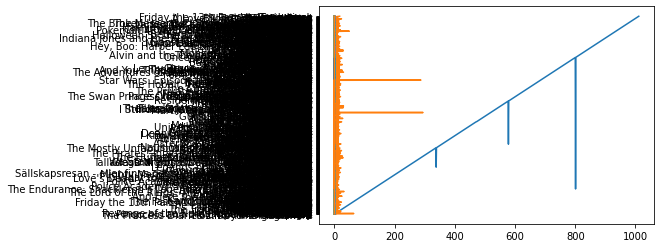

In [215]:
plt.plot(x1,y1);

In [216]:
corr=rm_df2.corr()

In [217]:
rm_df2.dtypes

id                   int64
title               object
popularity         float64
Action               int64
Adventure            int64
Animation            int64
Comedy               int64
Crime                int64
Documentary          int64
Drama                int64
Family               int64
Fantasy              int64
Foreign              int64
History              int64
Horror               int64
Music                int64
Mystery              int64
Romance              int64
Science Fiction      int64
TV Movie             int64
Thriller             int64
War                  int64
Western              int64
dtype: object

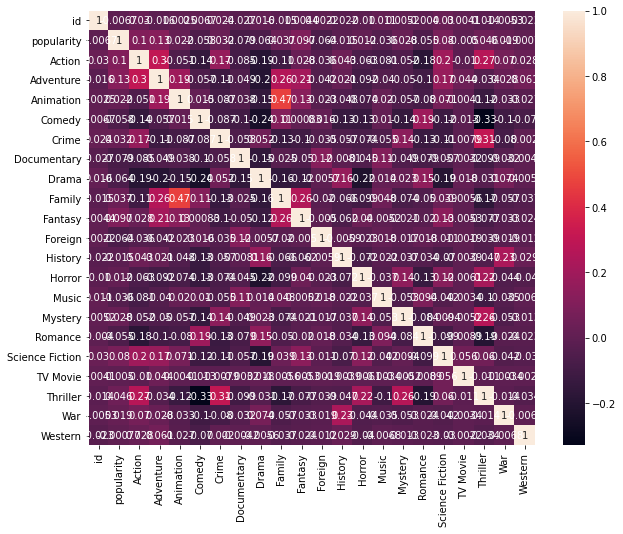

In [218]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,)

In [219]:
model.radius_neighbors_graph()

<909x909 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [220]:
model.effective_metric_

'euclidean'

In [221]:
rm_df2.columns

Index(['id', 'title', 'popularity', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [222]:
rm_df.head(3)

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]


In [223]:
X.shape

(2993, 22)

In [224]:
X.columns

Index(['id', 'popularity', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [225]:
X.head(3)

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
X2=X.drop(['id','popularity'],axis=1)

In [227]:
X2.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [228]:
rm_df.columns

Index(['id', 'title', 'popularity', 'genres'], dtype='object')

In [229]:
rm_df.shape

(2993, 4)

In [230]:
rm_df2.drop_duplicates(inplace=True)

In [231]:
rm_df2.isnull().sum()

id                 0
title              0
popularity         0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [233]:
rm_df2_pivot=rm_df2.set_index('title','id')
#rm_df2_pivot=X3.drop(inplace=True)
rm_df2_pivot

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,,
Hot Tub Time Machine 2,1,6.575393,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Princess Diaries 2: Royal Engagement,2,8.248895,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
Whiplash,3,64.299990,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Kahaani,4,3.174936,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Marine Boy,5,1.148070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chasers,2996,9.853270,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
We Are the Best!,2997,3.727996,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
The Long Kiss Goodnight,2998,14.482345,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
#rm_df2_pivot=rm_df2.pivot(index=['id','title'],columns=X2,values='popularity',).fillna(0.0)

In [ ]:
#rm_df2_pivot

In [234]:
from scipy.sparse import csr_matrix
rm_df2_matrix=csr_matrix(rm_df2_pivot)

In [235]:
rm_df2_matrix

<2993x22 sparse matrix of type '<class 'numpy.float64'>'
	with 13497 stored elements in Compressed Sparse Row format>

In [236]:
model_rm_df2=NearestNeighbors(metric='cosine')
model_rm_df2.fit(rm_df2_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

#### Valid values for metric are:

- from scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
- from scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]

In [237]:
model_rm_df2.get_params

<bound method BaseEstimator.get_params of NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)>

In [238]:
rm_df2_pivot.iloc[query,:]

id                 2607.000000
popularity            7.634017
Action                0.000000
Adventure             0.000000
Animation             0.000000
Comedy                1.000000
Crime                 1.000000
Documentary           0.000000
Drama                 0.000000
Family                0.000000
Fantasy               0.000000
Foreign               0.000000
History               0.000000
Horror                0.000000
Music                 0.000000
Mystery               0.000000
Romance               0.000000
Science Fiction       0.000000
TV Movie              0.000000
Thriller              0.000000
War                   0.000000
Western               0.000000
Name: Analyze This, dtype: float64

In [243]:
#(rm_df2_pivot.iloc[query,:].values.reshape(-1,22)).shape

(1, 22)

In [259]:
#rm_df2_pivot.iloc[query]

id                 691.000000
popularity           4.074783
Action               0.000000
Adventure            0.000000
Animation            0.000000
Comedy               1.000000
Crime                0.000000
Documentary          0.000000
Drama                1.000000
Family               0.000000
Fantasy              0.000000
Foreign              0.000000
History              0.000000
Horror               0.000000
Music                0.000000
Mystery              0.000000
Romance              1.000000
Science Fiction      0.000000
TV Movie             0.000000
Thriller             0.000000
War                  0.000000
Western              0.000000
Name: The Grass Is Greener, dtype: float64

In [258]:
query=np.random.choice(rm_df2_pivot.shape[0])
dist,indices=model_rm_df2.kneighbors(np.array(rm_df2_pivot.iloc[query,:].values).reshape(-1,22),n_neighbors=6)
for i in range(0,len(dist.flatten())):
  if i==0:
    print("Recommendation for {0} movie with movie id {1}:\n".format(rm_df2_pivot.index[query],rm_df2_pivot.iloc[query,0]))
  else:
    print("{0} : {1}, with distance of :{2}".format(i,rm_df2_pivot.index[indices.flatten()[i]],dist.flatten()[i]))

Recommendation for The Grass Is Greener movie with movie id 691:

1 : Prelude to a Kiss, with distance of :4.553539234564141e-08
2 : Ashby, with distance of :2.1801386729247696e-07
3 : Muriel's Wedding, with distance of :3.6690867966093776e-07
4 : Away We Go, with distance of :4.3505785496389393e-07
5 : Guess Who's Coming to Dinner, with distance of :4.880780586358213e-07


In [260]:
dist.min()

0.0

In [261]:
rm_df2_pivot.index[query]

'The Grass Is Greener'

In [262]:
if 'IThe Grass Is Greener' in rm_df2.title.values:
  print('Yes')
else:
  print('False')

False


In [263]:
rm_df2.loc[2630:2639].title

2630      The First Power
2631               Legion
2632      Men Cry Bullets
2633       22 Jump Street
2634          The Dilemma
2635             Top Five
2636         Mystery Date
2637              Killers
2638         Nim's Island
2639    Starship Troopers
Name: title, dtype: object

In [264]:
type(rm_df2.title[0])

str

In [265]:
rm_df2[rm_df2['id']==691]

,id,title,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
689,691,The Grass Is Greener,4.074783,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


- Finally the recommended movies using KNN are obtained using the cosine metric in Nearest Neighbours
- The results are given with their recommended id's, movie names and the distance calculated by using cosine similarity used for categorical variables like genres 

### Some of the recommendations made for people who watched 'The Grass Is Greener' movie
- Recommendation for The Grass Is Greener movie with movie id 691:

1. 1 : Prelude to a Kiss, with distance of :4.553539234564141e-08
2. 2 : Ashby, with distance of :2.1801386729247696e-07
3. 3 : Muriel's Wedding, with distance of :3.6690867966093776e-07
4. 4 : Away We Go, with distance of :4.3505785496389393e-07
5. 5 : Guess Who's Coming to Dinner, with distance of :4.880780586358213e-07

### Calculating only for 1100 samples for simplicity and more precisely

In [278]:
rm_df3=rm_df2.sample(n=1100,replace=False)
rm_df3.head(3)

,id,title,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
2970,2978,Angel Eyes,5.396200,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
430,431,Everybody Wants Some!!,6.737797,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2763,2770,The Fourth Kind,13.751992,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [279]:
X3=rm_df3.set_index('title')
#X3.drop(columns='id',inplace=True)
X3

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,,
Angel Eyes,2978,5.396200,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
Everybody Wants Some!!,431,6.737797,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Fourth Kind,2770,13.751992,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
Vantage Point,1294,7.001645,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Rent,1455,9.530278,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frankenweenie,1120,10.296047,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Moon,1432,13.336773,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
A Cinderella Story,787,8.385361,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
movie_rm_df3_matrix = csr_matrix(X3.values)

In [281]:
movie_rm_df3_matrix

<1100x22 sparse matrix of type '<class 'numpy.float64'>'
	with 4976 stored elements in Compressed Sparse Row format>

In [282]:
model_rm_df3 = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_rm_df3.fit(movie_rm_df3_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [283]:
query3 = np.random.choice(X3.shape[0])
print(query3)

93


In [286]:
X3

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,,
Angel Eyes,2978,5.396200,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
Everybody Wants Some!!,431,6.737797,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Fourth Kind,2770,13.751992,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
Vantage Point,1294,7.001645,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Rent,1455,9.530278,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frankenweenie,1120,10.296047,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Moon,1432,13.336773,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
A Cinderella Story,787,8.385361,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [288]:
#X3.iloc[query]

id                 1515.000000
popularity           17.602928
Action                0.000000
Adventure             0.000000
Animation             0.000000
Comedy                0.000000
Crime                 0.000000
Documentary           0.000000
Drama                 0.000000
Family                0.000000
Fantasy               0.000000
Foreign               0.000000
History               0.000000
Horror                1.000000
Music                 0.000000
Mystery               0.000000
Romance               0.000000
Science Fiction       0.000000
TV Movie              0.000000
Thriller              0.000000
War                   0.000000
Western               0.000000
Name: Sinister 2, dtype: float64

In [284]:
dist3, indices3 = model_rm_df3.kneighbors(np.array(X3.iloc[query3,:].values).reshape(1, -1), n_neighbors = 6)

In [290]:
for i in range(0, len(dist3.flatten())):
    if i == 0:
        print('Recommendations for {0} movie with id {1}:\n'.format(X3.index[query3],X3.iloc[query,0]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X3.index[indices3.flatten()[i]], dist3.flatten()[i]))

Recommendations for Rebecca movie with id 1515:

1: The Fighter, with distance of 3.3352876380732255e-06:
2: Before Midnight, with distance of 3.963685868746403e-06:
3: Pi, with distance of 4.117366658173971e-06:
4: Gold, with distance of 4.299469638868736e-06:
5: Unforgettable, with distance of 4.473987074260499e-06:


In [291]:
X3_test=rm_df3[1000:1010].set_index('title')
#X3_test.drop(columns='id',inplace=True)

In [292]:
test_movie3=X3_test.index.tolist()

In [293]:
test_movie3

['Prom',
 'Dr. Giggles',
 'Caché',
 'The Illusionist',
 'Blood Work',
 'In Bruges',
 'Howards End',
 'The Great Dictator',
 'Wise Guys',
 'Lenny Bruce: Swear to Tell the Truth']

In [302]:
X3_test.shape

(10, 22)

In [324]:
X3.loc[movie_name,:]

id                 753.000000
popularity           0.358968
Action               0.000000
Adventure            0.000000
Animation            0.000000
Comedy               1.000000
Crime                0.000000
Documentary          1.000000
Drama                0.000000
Family               0.000000
Fantasy              0.000000
Foreign              0.000000
History              0.000000
Horror               0.000000
Music                0.000000
Mystery              0.000000
Romance              0.000000
Science Fiction      0.000000
TV Movie             0.000000
Thriller             0.000000
War                  0.000000
Western              0.000000
Name: Lenny Bruce: Swear to Tell the Truth, dtype: float64

In [331]:
for movie_name in test_movie3:
    model_rm_df3.fit(X3_test)
    dist3, indices3 = model_rm_df3.kneighbors(np.array(X3.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(dist3.flatten())):
        if i == 0:
            print('Recommendations for {0} movie with {1} id:\n'.format(movie_name,X3.loc[movie_name]['id']))
            print()
        else:
            print('{0}: {1}, with distance of : {2}'.format(i, X3.index[indices3.flatten()[i]], dist3.flatten()[i]))
    print()

Recommendations for Prom movie with 2048.0 id:


1: Mulholland Drive, with distance of : 1.1757132167833362e-07
2: Rent, with distance of : 6.430663767043043e-07
3: Vantage Point, with distance of : 8.397264464887755e-07
4: Sleepless in Seattle, with distance of : 1.1351197648501454e-06
5: More Than a Game, with distance of : 1.2418215563636537e-06

Recommendations for Dr. Giggles movie with 26.0 id:


1: Cell, with distance of : 0.0037979165718523555
2: Sleepless in Seattle, with distance of : 0.00389555546372089
3: Vantage Point, with distance of : 0.003913647836450762
4: Mulholland Drive, with distance of : 0.003917954257722123
5: Angel Eyes, with distance of : 0.003934850739805595

Recommendations for Caché movie with 32.0 id:


1: Everybody Wants Some!!, with distance of : 0.010145553120181172
2: Cell, with distance of : 0.0158081419529168
3: Sleepless in Seattle, with distance of : 0.016110341831030328
4: Vantage Point, with distance of : 0.016175376322249413
5: Mulholland Drive,

In [323]:
X3_test

,id,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,,
Prom,2048,6.167646,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dr. Giggles,26,1.252367,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
Caché,32,5.695860,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
The Illusionist,1782,6.971611,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Blood Work,2440,5.852263,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
In Bruges,1632,9.895652,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Howards End,2512,10.854598,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
The Great Dictator,2653,9.241748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wise Guys,950,1.884204,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- All the recommendations are made for all the test set data movies using KNN algorithm.